In [13]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

##### Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted separately, and adding this result to seasonally adjusted M1.
Source: https://fred.stlouisfed.org/series/M2SL

In [15]:
# Pull M2 Supply data
m2_supply = fred.get_series('M2SL', observation_start='2010-01-01')
m2_supply = m2_supply.dropna()
m2_supply.tail()

2021-08-01    20834.1
2021-09-01    20996.9
2021-10-01    21186.8
2021-11-01    21437.0
2021-12-01    21638.1
dtype: float64

In [16]:
# Read in S&P 500 history
sp_history = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/economic-indicators/resources/sp_history.csv', parse_dates=True, index_col='Date')
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-27,4380.580078,4428.740234,4309.500000,4326.509766,4326.509766,4.074330e+09
2022-01-28,4336.189941,4432.720215,4292.459961,4431.850098,4431.850098,3.936030e+09
2022-01-29,4336.189941,4432.720215,4292.459961,4431.850098,4431.850098,3.936030e+09
2022-01-30,4336.189941,4432.720215,4292.459961,4431.850098,4431.850098,3.936030e+09
2022-01-31,4431.790039,4516.890137,4414.020020,4515.549805,4515.549805,4.001950e+09


In [17]:
# Pull Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
cpi = fred.get_series('CPIAUCSL', observation_start='1990-01-01')
cpi.tail()

2021-09-01    274.214
2021-10-01    276.590
2021-11-01    278.524
2021-12-01    280.126
2022-01-01    281.933
dtype: float64

In [18]:
# Pull US GDP data
gdp = fred.get_series('GDP', observation_start='1990-01-01')
cpi.tail()

2021-09-01    274.214
2021-10-01    276.590
2021-11-01    278.524
2021-12-01    280.126
2022-01-01    281.933
dtype: float64

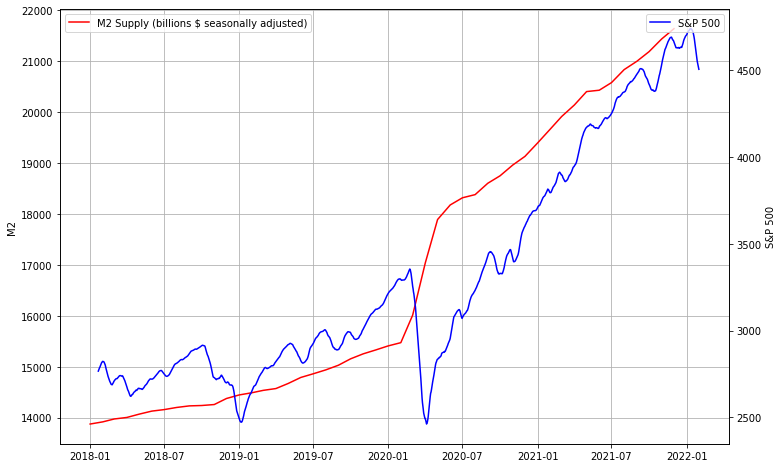

In [10]:
#Plot M2 Supply vs S&P 500
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply['2018':'2021'], label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=20).mean(), label ='S&P 500', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

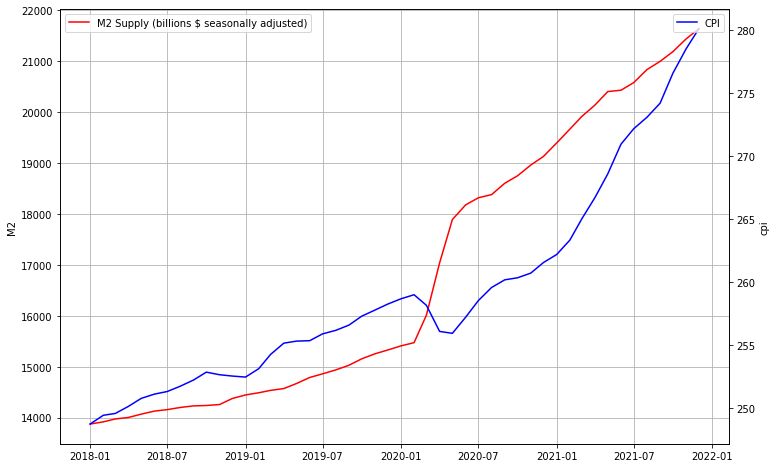

In [11]:
# Plot M2 Supply vs CPI
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply['2018':'2021'], label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(cpi['2018':'2021'], label ='CPI', color='b')
ax2.set_ylabel('cpi')
ax2.legend(loc='upper right')

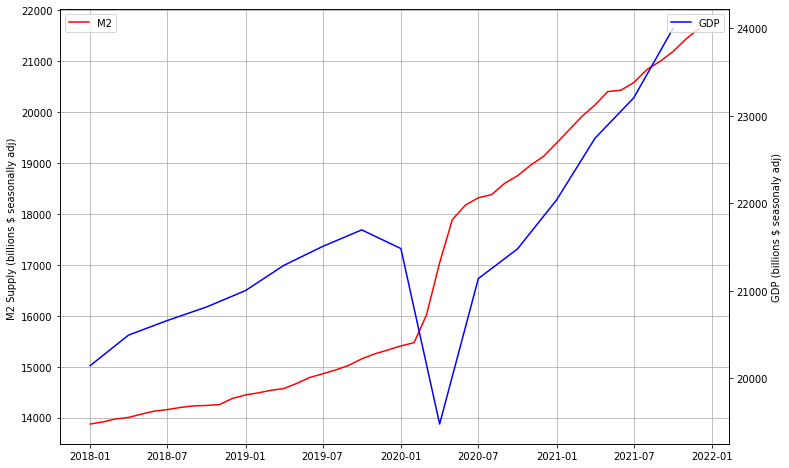

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply['2018':'2021'], label ='M2', color='r')
ax.set_ylabel('M2 Supply (billions $ seasonally adj) ')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(gdp['2018':'2021'], label ='GDP', color='b')
ax2.set_ylabel('GDP (billions $ seasonaly adj)')
ax2.legend(loc='upper right')